## K Means from scratch

In [75]:
#%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (9, 6)
#plt.style.use('ggplot')

In [18]:
# Importing the dataset
data = pd.read_csv('dataset.csv')
print(data.shape)
data.head()

(5000, 2)


,V1,V2
0,4.53320,6.06542
1,5.20651,5.94591
2,5.16664,6.60290
3,5.70023,5.70741
4,5.24035,5.18443


V1
V2


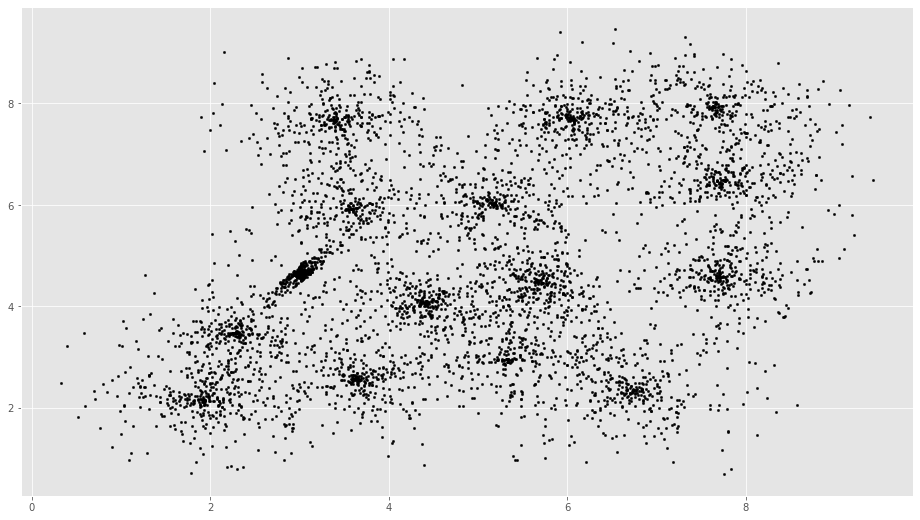

In [29]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values

for key in data.keys():
    print(key)
X = np.array(list(zip(f1, f2)))
#X=[[1, 1], [1, 2], [3, 3],[4,4]]
plt.scatter(f1, f2, c='black', s=5)

In [30]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [35]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-2, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-2, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[4. 1.]
 [1. 1.]
 [5. 6.]]


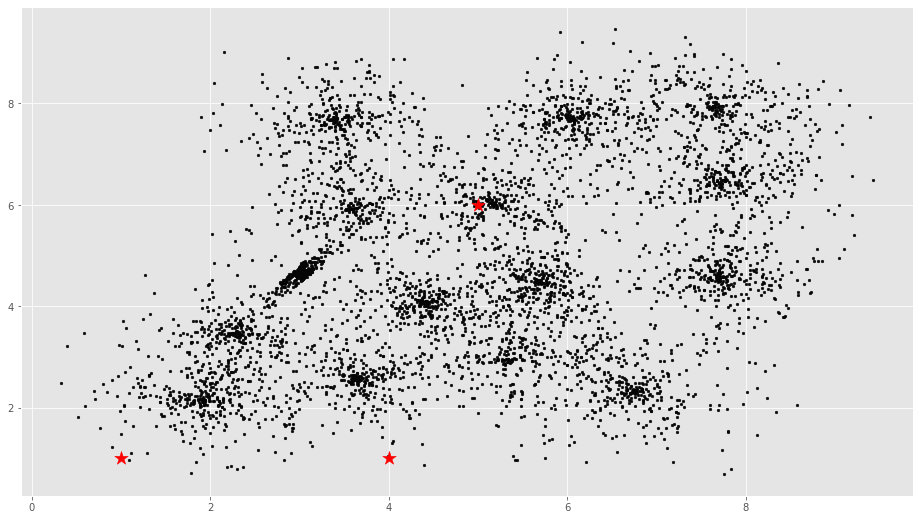

In [36]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='r')

In [37]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

In [40]:
C_old

array([[6.389886 , 3.6626096],
       [3.0449607, 3.5962405],
       [5.8468285, 7.149968 ]], dtype=float32)

In [39]:
C

array([[6.389886 , 3.6626096],
       [3.0449607, 3.5962405],
       [5.8468285, 7.149968 ]], dtype=float32)

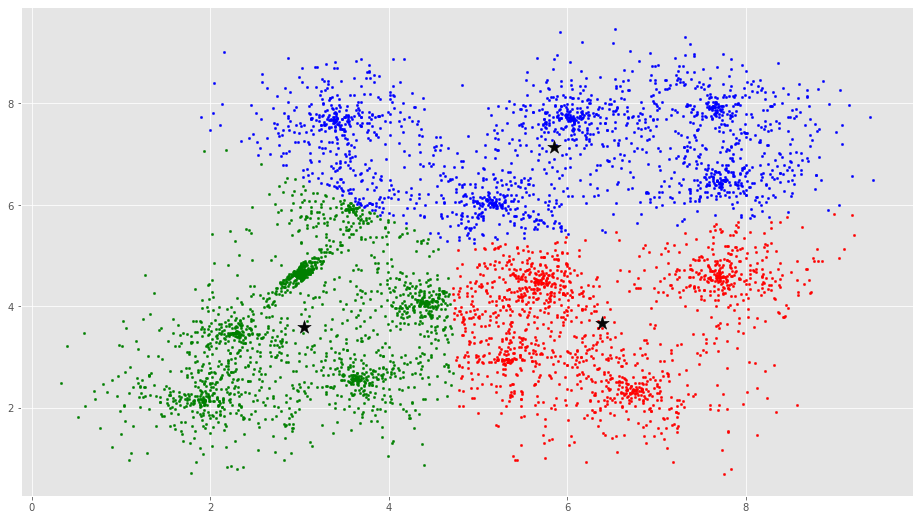

In [38]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=5, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## The scikit-learn approach

In [41]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [42]:
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[6.389886  3.6626096]
 [3.0449607 3.5962405]
 [5.8468285 7.149968 ]]
[[6.38841377 3.66111698]
 [5.84742355 7.14823339]
 [3.04429218 3.5952066 ]]


You can see that the centroid values are equal, but in different order.

We will generate a new dataset using make_blobs function.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4, random_state=1)

C:\Users\AdmiN\AppData\Local\Temp\ipykernel_9684\2780865410.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


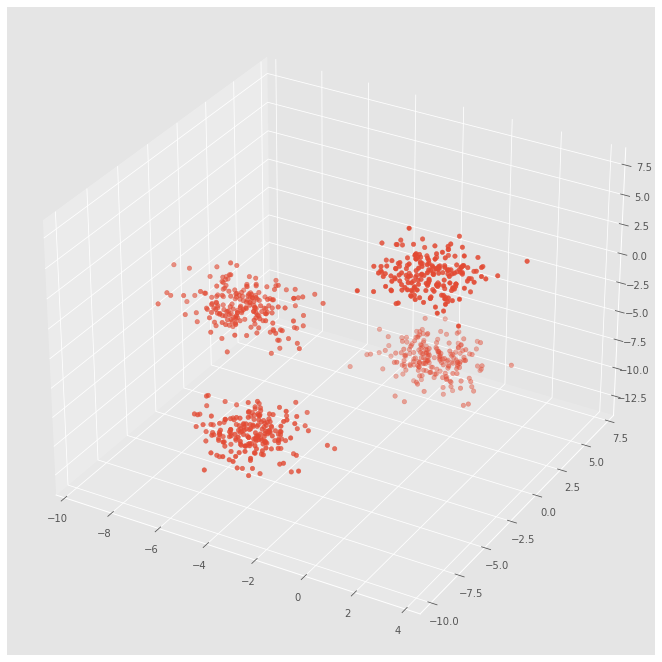

In [68]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [69]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [71]:
labels

array([1, 2, 2, 2, 3, 2, 0, 2, 1, 1, 3, 2, 1, 0, 3, 3, 1, 2, 2, 1, 0, 3,
       3, 1, 3, 1, 3, 3, 1, 2, 0, 0, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2,
       0, 1, 3, 0, 0, 3, 3, 0, 0, 1, 3, 1, 3, 0, 2, 2, 0, 1, 1, 1, 0, 1,
       3, 3, 1, 0, 2, 3, 3, 0, 1, 2, 2, 0, 3, 3, 2, 1, 1, 1, 3, 1, 3, 2,
       0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 3, 0, 3, 3,
       1, 2, 1, 0, 2, 3, 1, 2, 3, 0, 2, 0, 1, 0, 2, 1, 3, 2, 2, 3, 1, 0,
       3, 1, 1, 3, 1, 2, 2, 3, 1, 0, 0, 2, 1, 1, 1, 3, 3, 3, 3, 2, 1, 0,
       2, 3, 2, 1, 0, 2, 1, 0, 1, 1, 3, 1, 3, 0, 0, 3, 2, 0, 3, 0, 0, 0,
       3, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 3, 1, 0, 1, 2, 3, 1, 2,
       1, 2, 3, 0, 3, 3, 1, 3, 1, 3, 0, 3, 2, 1, 3, 1, 3, 0, 1, 3, 3, 1,
       3, 2, 0, 0, 3, 0, 1, 3, 0, 1, 2, 0, 3, 1, 0, 3, 3, 2, 2, 0, 1, 3,
       2, 1, 3, 1, 0, 3, 3, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2, 3, 3, 2,
       1, 1, 3, 3, 1, 1, 3, 0, 3, 2, 0, 0, 3, 1, 1, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 1, 3, 1, 3, 1, 2, 0, 1, 0, 2, 2, 0, 1,

C:\Users\AdmiN\AppData\Local\Temp\ipykernel_9684\1456065186.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


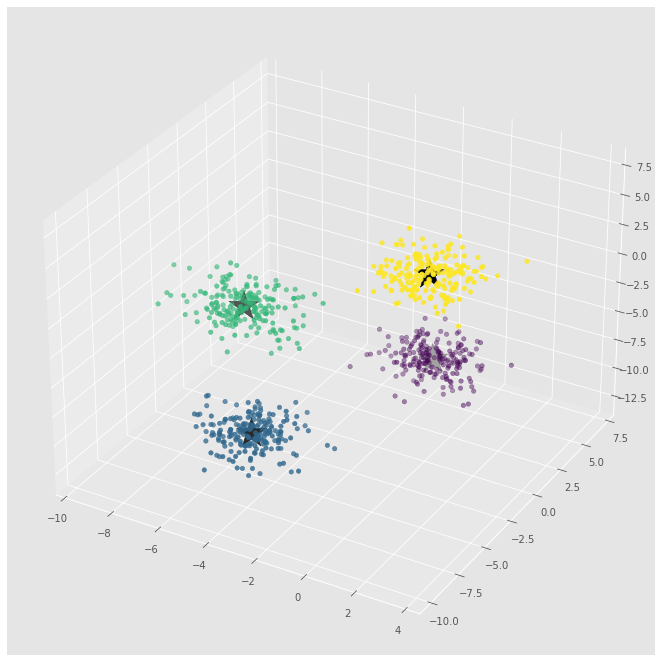

In [70]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

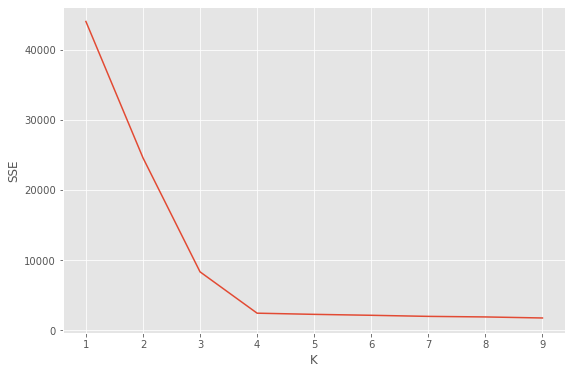

In [76]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    #X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()